<a href="https://colab.research.google.com/github/chpark0803/python/blob/main/%EB%B0%95%EC%B0%AC%ED%98%B8_2024177920_%EA%B8%B0%EB%A7%90%EA%B3%A0%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [259]:
# 폰트 설정

!apt-get update -qq
!apt-get install fonts-nanum* -qq

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)

plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'})

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#구글 드라이브에 저장한 엑셀파일 raw data 불러오기
from google.colab import drive
drive.mount('/content/gdrive')

# 2020년 11월 엑셀파일 raw data
xlsx_2020 = '/content/gdrive/My Drive/PYTHON/성동구립성수도서관 장서 대출목록 (2020년 11월).xlsx'
df_2020 = pd.read_excel(xlsx_2020)
df_2020.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,슈퍼영웅 지침서.,엘리아스 볼룬드 글;앙네스 볼룬드 그림;김상열 옮김,북뱅크,2020,9788966351206,NaN,7,3.0,859.7,1,0,2020-11-25
1,2,워드 매직체인.,제이제이 글;원프로 그림,맥코웰E&C(쏘굿에듀테인먼트),2020,9791196875640,NaN,7,4.0,744,1,0,2020-11-25
2,3,워드 매직체인.,제이제이 글;원프로 그림,Sogood Edutainment,2019,9791196875633,NaN,7,3.0,744,1,0,2020-11-25
3,4,(천하무적) 개냥이 수사대.,이승민 지음;하민석 그림,위즈덤하우스,2020,9791191119114,NaN,7,2.0,813.8,1,0,2020-11-25
4,5,건방이의 초강력 수련기.,천효정 지음;이정태 그림,비룡소,2020,9788949124438,NaN,7,2.0,813.8,1,0,2020-11-25


In [261]:
# 2023년 11월 엑셀파일 raw data
xlsx_2023 = '/content/gdrive/My Drive/PYTHON/성동구립성수도서관 장서 대출목록 (2023년 11월).xlsx'
df_2023 = pd.read_excel(xlsx_2023)
df_2023.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,(내면의 성장을 넘어 경제적 부까지 이뤄준) 10억짜리 독서법,손승욱,위즈덤하우스,2023,9791168128880,NaN,0,NaN,029.4,1,0,2023-11-22
1,2,투자도 인생도 복리처럼,가우탐 바이드,한국투자교육연구소,2023,9791197811784,NaN,NaN,NaN,327,1,0,2023-11-22
2,3,요괴의 아이를 키우고 있습니다 1,히로시마 레이코,넥서스,2022,9791166832925,9.791167e+12,NaN,NaN,813,1,0,2023-11-22
3,4,추세추종 투자전략,마이클 코벨,이레미디어,2023,9791191328929,NaN,NaN,NaN,327,1,0,2023-11-22
4,5,중세. 3: 만화로 배우는 서양사,올리비에 보비노,한빛비즈,2021,9791157845095,NaN,NaN,NaN,920,1,0,2023-11-22


# **1. 2020년 11월과 비교하여 2023년 11월 시점에서 추가된 도서의 목록 및 개수**

In [262]:
# 2023년 11월과 2020년 11월 데이터에서 추가된 도서 찾기
added_books = df_2023[~df_2023['ISBN'].isin(df_2020['ISBN'])]

In [263]:
# 2023년 11월과 2020년 11월 데이터에서 추가된 도서 개수
added_count = len(added_books)

In [264]:
# 2023년 11월과 2020년 11월 데이터에서 추가된 도서 개수 출력하기
added_count


11785

In [265]:
# 2023년 11월과 2020년 11월 데이터에서 추가된 도서 목록 출력하기
added_books

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,(내면의 성장을 넘어 경제적 부까지 이뤄준) 10억짜리 독서법,손승욱,위즈덤하우스,2023,9791168128880,NaN,0,NaN,029.4,1,0,2023-11-22
1,2,투자도 인생도 복리처럼,가우탐 바이드,한국투자교육연구소,2023,9791197811784,NaN,NaN,NaN,327,1,0,2023-11-22
2,3,요괴의 아이를 키우고 있습니다 1,히로시마 레이코,넥서스,2022,9791166832925,9.791167e+12,NaN,NaN,813,1,0,2023-11-22
3,4,추세추종 투자전략,마이클 코벨,이레미디어,2023,9791191328929,NaN,NaN,NaN,327,1,0,2023-11-22
4,5,중세. 3: 만화로 배우는 서양사,올리비에 보비노,한빛비즈,2021,9791157845095,NaN,NaN,NaN,920,1,0,2023-11-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39429,39430,일상철학,김정휘 지음,청어,2015,9791158608538,9.791159e+12,0,NaN,104,1,4,2015-10-02
42539,42540,꼬마 철학자 휴고,오스카 브르니피에 지음;자크 데프레 그림;콩세알 옮김,그리고책,2014,9788997686506,9.788998e+12,7,NaN,100,1,14,2014-10-01
62103,62104,뇌 :,베르나르 베르베르 지음 ;이세욱 옮김,열린책들,2011,9788932906737,9.788933e+12,0,NaN,863,1,62,2012-09-09
62104,62105,뇌 :,베르나르 베르베르 지음 ;이세욱 옮김,열린책들,2011,9788932906737,9.788933e+12,0,NaN,863,1,61,2012-09-09


# **2. 2020년 11월과 비교하여 2023년 11월 시점에서 없어진 도서의 목록 및 개수**

In [266]:
# 2020년 11월 데이터에서 2023년 11월 데이터를 제거
missing_list = df_2020[~df_2020['ISBN'].isin(df_2023['ISBN'])]

In [267]:
# 2020년 11월 데이터와 2023년 11월 데이터 간 없어진 도서 개수
missing_count = len(missing_list)

In [268]:
# 2020년 11월 데이터와 2023년 11월 데이터 간 없어진 도서 개수 출력하기
missing_count

7103

In [269]:
# 2020년 11월 데이터와 2023년 11월 데이터 간 없어진 도서 목록 출력하기
missing_list

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
500,501,해리포터와 죽음의 성물.,J.K. 롤링 지음;강동혁 옮김,문학수첩,2020,9788983928054,NaN,0,3.0,843,1,1,2020-11-04
522,523,위대한 개츠비,F. 스콧 피츠제럴드 지음;김욱동 옮김,민음사,2010,9788937460753,9788937460005,0,NaN,808,1,2,2020-11-04
926,927,선(禪)의 통쾌한 농담,김영욱 지음,주니어김영사,2020,9788934995050,NaN,0,NaN,654.22,1,3,2020-09-08
941,942,콩쥐의 달팽이 가방,이송현 글;김마늘 그림,키움북스,2020,9788968736513,NaN,7,NaN,375.1,0,0,2020-09-03
944,945,방귀 대장 뭉치,곰세마리 글;이형진 그림,한국가우스,2020,9788960168305,NaN,7,NaN,375.1,0,0,2020-09-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62359,62360,까치설날은 보물 찾는 날,임병희 글;이경석 그림,웅진씽크빅,2012,9788901136325,9788901105840,7,NaN,308,1,24,2012-08-06
62427,62428,Harry Potter and the sorcerer's stone,By J.K.Rowiing;Illustrations by Mary GrandPre,Scholastic Press,1999,9780590353427,NaN,5,NaN,843,1,54,2012-08-06
62807,62808,Henry and Mudge and the great grandpas:,Story by Cynthia Rylant;Pictures by Sucie Stev...,Simon Spotlight,2006,9780689834479,NaN,5,NaN,747,1,36,2012-08-06
62904,62905,I＇m a fire fighter,by Mary Packard;Illustrated by Julie Durrell,Scholastic,2003,9780439594318,NaN,5,NaN,747,1,31,2012-08-06


# **3. 2020년 11월과 2023년 11월 가장 대출이 많이 발생한 도서 상위 20권의 리스트와 그 빈도수 비교**

In [270]:
# 2020년 11월 가장 대출이 많이 발생한 도서 상위 20권 출력 (대출건수 값 기준)
df_2020_sorted = df_2020.sort_values('대출건수', ascending=False).head(20)
df_2020_sorted

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
41043,41044,살인자의 기억법:,김영하 지음,문학동네,2013,9788954622035,NaN,0,NaN,813.6,1,171,2013-09-14
59138,59139,쾌걸 조로리,하라 유타카 글·그림;오용택 옮김,북이십일,2012,9788950925161,9788950921750,7,NaN,833.8,1,160,2012-08-09
51533,51534,해리포터와 마법사의 돌,조앤 K. 롤링 지음;김혜원 옮김,문학수첩,2012,9788983920690,9788983920676,0,NaN,843,1,153,2012-09-11
54836,54837,식객=食客,허영만 글·그림,김영사,2010,9788934926467,NaN,0,NaN,594.51,1,150,2012-09-11
58327,58328,쾌걸 조로리,하라 유타카 글·그림;오용택 옮김,북이십일,2010,9788950922443,9788950921750,7,NaN,833.8,1,149,2012-08-09
55344,55345,내일은 실험왕,곰돌이 co. 글 ;홍종현 그림,대한교과서,2009,9788937842269,9788937842283,7,NaN,407,1,148,2012-09-10
47938,47939,나미야 잡화점의 기적:히가시노 게이고 장편소설,히가시노 게이고 지음;양윤옥 옮김,현대문학,2013,9788972756194,NaN,0,NaN,833.6,1,146,2013-02-27
58326,58327,쾌걸 조로리,하라 유타카 글·그림;오용택 옮김,북이십일,2011,9788950922443,9788950921750,7,NaN,833.8,1,146,2012-08-09
50186,50187,(수학 유령의)미스터리 암호수학,정재은 지음;김현민 그림,글송이,2012,9788955726718,NaN,7,NaN,410,1,146,2012-10-22
54835,54836,식객=食客,허영만 글·그림,김영사,2010,9788934926474,NaN,0,NaN,594.51,1,142,2012-09-11


In [271]:
# 2023년 11월 가장 대출이 많이 발생한 도서 상위 20권 출력 (대출건수 값 기준)
df_2023_sorted = df_2023.sort_values('대출건수', ascending=False).head(20)
df_2023_sorted

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
49245,49246,살인자의 기억법:,김영하 지음,문학동네,2013,9788954622035,NaN,0,NaN,813.6,1,199,2013-09-14
54933,54934,나미야 잡화점의 기적:히가시노 게이고 장편소설,히가시노 게이고 지음;양윤옥 옮김,현대문학,2013,9788972756194,NaN,0,NaN,833.6,1,191,2013-02-27
63217,63218,쾌걸 조로리,하라 유타카 글·그림;오용택 옮김,북이십일,2012,9788950925161,9.788951e+12,7,NaN,833.8,1,175,2012-08-09
57530,57531,해리포터와 마법사의 돌,조앤 K. 롤링 지음;김혜원 옮김,문학수첩,2012,9788983920690,9.788984e+12,0,NaN,843,1,169,2012-09-11
61998,61999,7년의 밤 :정유정 장편소설,정유정 지음,은행나무,2011,9788956604992,NaN,0,NaN,813.6,1,168,2012-09-09
60453,60454,(엽기 과학자)프래니,짐 벤튼 글·그림;박수현 옮김,언어세상,2006,9788955856231,9.788956e+12,7,NaN,843,1,167,2012-09-10
60095,60096,식객=食客,허영만 글·그림,김영사,2010,9788934926467,NaN,0,NaN,594.51,1,167,2012-09-11
62699,62700,쾌걸 조로리,하라 유타카 글·그림;오용택 옮김,북이십일,2010,9788950922443,9.788951e+12,7,NaN,833.8,1,163,2012-08-09
60452,60453,(엽기 과학자)프래니,짐 벤튼 글·그림;박수현 옮김,언어세상,2006,9788955856248,9.788956e+12,7,NaN,843,1,158,2012-09-10
60094,60095,식객=食客,허영만 글·그림,김영사,2010,9788934926474,NaN,0,NaN,594.51,1,158,2012-09-11


# **4. 2020년 11월과 2023년 11월 가장 대출이 많이 발생한 도서 상위 100권 중 동일한 도서의 리스트와 그 개수 (100권이 적당하지 않으면 숫자를 조정 가능)**

In [272]:
# 2020년 11월 가장 대출이 많이 발생한 도서 상위 100권
df_2020_top100 = df_2020.sort_values('대출건수', ascending=False).head(100)

In [273]:
# 2023년 11월 가장 대출이 많이 발생한 도서 상위 100권
df_2023_top100 = df_2023.sort_values('대출건수', ascending=False).head(100)

In [274]:
# 2020년 11월과 2023년 11월의 상위 100권 중 동일한 도서의 리스트 출력
same_books = pd.merge(df_2020_top100, df_2023_top100, on='도서명')
#print(same_books)
same_books

,번호_x,도서명,저자_x,출판사_x,발행년도_x,ISBN_x,세트 ISBN_x,부가기호_x,권_x,주제분류번호_x,...,출판사_y,발행년도_y,ISBN_y,세트 ISBN_y,부가기호_y,권_y,주제분류번호_y,도서권수_y,대출건수_y,등록일자_y
0,41044,살인자의 기억법:,김영하 지음,문학동네,2013,9788954622035,NaN,0,NaN,813.6,...,문학동네,2013,9788954622035,NaN,0,NaN,813.6,1,199,2013-09-14
1,59139,쾌걸 조로리,하라 유타카 글·그림;오용택 옮김,북이십일,2012,9788950925161,9788950921750,7,NaN,833.8,...,북이십일,2012,9788950925161,9.788951e+12,7,NaN,833.8,1,175,2012-08-09
2,59139,쾌걸 조로리,하라 유타카 글·그림;오용택 옮김,북이십일,2012,9788950925161,9788950921750,7,NaN,833.8,...,북이십일,2010,9788950922443,9.788951e+12,7,NaN,833.8,1,163,2012-08-09
3,59139,쾌걸 조로리,하라 유타카 글·그림;오용택 옮김,북이십일,2012,9788950925161,9788950921750,7,NaN,833.8,...,북이십일,2011,9788950922443,9.788951e+12,7,NaN,833.8,1,158,2012-08-09
4,59139,쾌걸 조로리,하라 유타카 글·그림;오용택 옮김,북이십일,2012,9788950925161,9788950921750,7,NaN,833.8,...,북이십일,2010,9788950922429,9.788951e+12,7,NaN,833.8,1,144,2012-08-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,62304,(앤서니 브라운의)마술 연필,앤서니 브라운 글·그림;서애경 옮김,웅진씽크빅,2011,9788901113241,9788901026978,7,NaN,808.9,...,웅진씽크빅,2011,9788901113241,NaN,7,NaN,808.9,1,131,2012-08-06
122,43891,똥떡,이춘희 글;박지훈 그림,이퍼블릭,2011,9788964804773,9788964804766,6,NaN,388.311,...,이퍼블릭,2011,9788964804773,NaN,6,NaN,388.311,2,124,2013-06-07
123,41552,겁쟁이 빌리,앤터니 브라운 글·그림;김경미 옮김,비룡소,2012,9788949111636,9788949110004,7,NaN,808.9,...,비룡소,2012,9788949111636,NaN,7,NaN,808.9,1,136,2013-09-04
124,56184,찰리와 초콜릿 공장,로알드 달 글 ;?틴 블레이크 그림 ;지혜연 옮김,시공주니어,2000,9788952701954,NaN,7,NaN,808.9,...,시공주니어,2000,9788952701954,NaN,7,NaN,808.9,1,124,2012-09-10


In [275]:
# 2020년 11월과 2023년 11월의 상위 100권 중 동일한 도서의 개수 출력
samebooks_count = len(same_books)

samebooks_count

126

# **5. 2020년 11월 가장 대출이 많이 발생한 도서 상위 50권의 당시 대출 횟수와 현재 대출 횟수 비교하여 증가한 도서와 감소한 도서 파악, 그래프로 표현**

In [276]:
# 필요한 컬럼 값만 추출

df_2020 = df_2020[['ISBN', '도서명', '대출건수']]
df_2023 = df_2023[['ISBN', '도서명', '대출건수']]

In [277]:
# 필요한 컬럼 값만 추출

df_2020.columns = ['ISBN', '도서명', '대출건수_2020']
df_2023.columns = ['ISBN', '도서명', '대출건수_2023']

In [278]:
# 2020년 11월의 대출건수 기준으로 상위 50권 추출

top50_2020 = df_2020.nlargest(50, '대출건수_2020')

top50_2020

,ISBN,도서명,대출건수_2020
41043,9788954622035,살인자의 기억법:,171
59138,9788950925161,쾌걸 조로리,160
51533,9788983920690,해리포터와 마법사의 돌,153
54836,9788934926467,식객=食客,150
58327,9788950922443,쾌걸 조로리,149
55344,9788937842269,내일은 실험왕,148
47938,9788972756194,나미야 잡화점의 기적:히가시노 게이고 장편소설,146
50186,9788955726718,(수학 유령의)미스터리 암호수학,146
58326,9788950922443,쾌걸 조로리,146
54835,9788934926474,식객=食客,142


In [279]:
# 2020년 11월의 대출건수 상위 50권에 해당하는 2023년 데이터와 병합

merged_data = pd.merge(top50_2020, df_2023[['ISBN', '대출건수_2023']], on='ISBN', how='left')

In [280]:
# 병합한 데이터에서 변화(증가 & 감소) 파악

merged_data['Change'] = merged_data['대출건수_2023'] - merged_data['대출건수_2020']
increased_books = merged_data[merged_data['Change'] > 0]
decreased_books = merged_data[merged_data['Change'] < 0]

In [281]:
# 증가한 책 정보 출력

increased_books

,ISBN,도서명,대출건수_2020,대출건수_2023,Change
0,9788954622035,살인자의 기억법:,171,199.0,28.0
1,9788950925161,쾌걸 조로리,160,175.0,15.0
2,9788983920690,해리포터와 마법사의 돌,153,169.0,16.0
3,9788934926467,식객=食客,150,167.0,17.0
21,9788950922443,쾌걸 조로리,149,158.0,9.0
22,9788950922443,쾌걸 조로리,149,163.0,14.0
24,9788972756194,나미야 잡화점의 기적:히가시노 게이고 장편소설,146,191.0,45.0
43,9788950922443,쾌걸 조로리,146,158.0,12.0
44,9788950922443,쾌걸 조로리,146,163.0,17.0
45,9788934926474,식객=食客,142,158.0,16.0


In [282]:
# 감소한 책 정보 출력

decreased_books

,ISBN,도서명,대출건수_2020,대출건수_2023,Change
4,9788950922443,쾌걸 조로리,149,48.0,-101.0
5,9788950922443,쾌걸 조로리,149,37.0,-112.0
6,9788950922443,쾌걸 조로리,149,43.0,-106.0
7,9788950922443,쾌걸 조로리,149,73.0,-76.0
8,9788950922443,쾌걸 조로리,149,68.0,-81.0
...,...,...,...,...,...
189,9788963702407,(Who?)코코 샤넬 =Coco Chanel,116,87.0,-29.0
190,9788963702407,(Who?)코코 샤넬 =Coco Chanel,116,84.0,-32.0
191,9788963702407,(Who?)코코 샤넬 =Coco Chanel,116,74.0,-42.0
192,9788963702407,(Who?)코코 샤넬 =Coco Chanel,116,80.0,-36.0


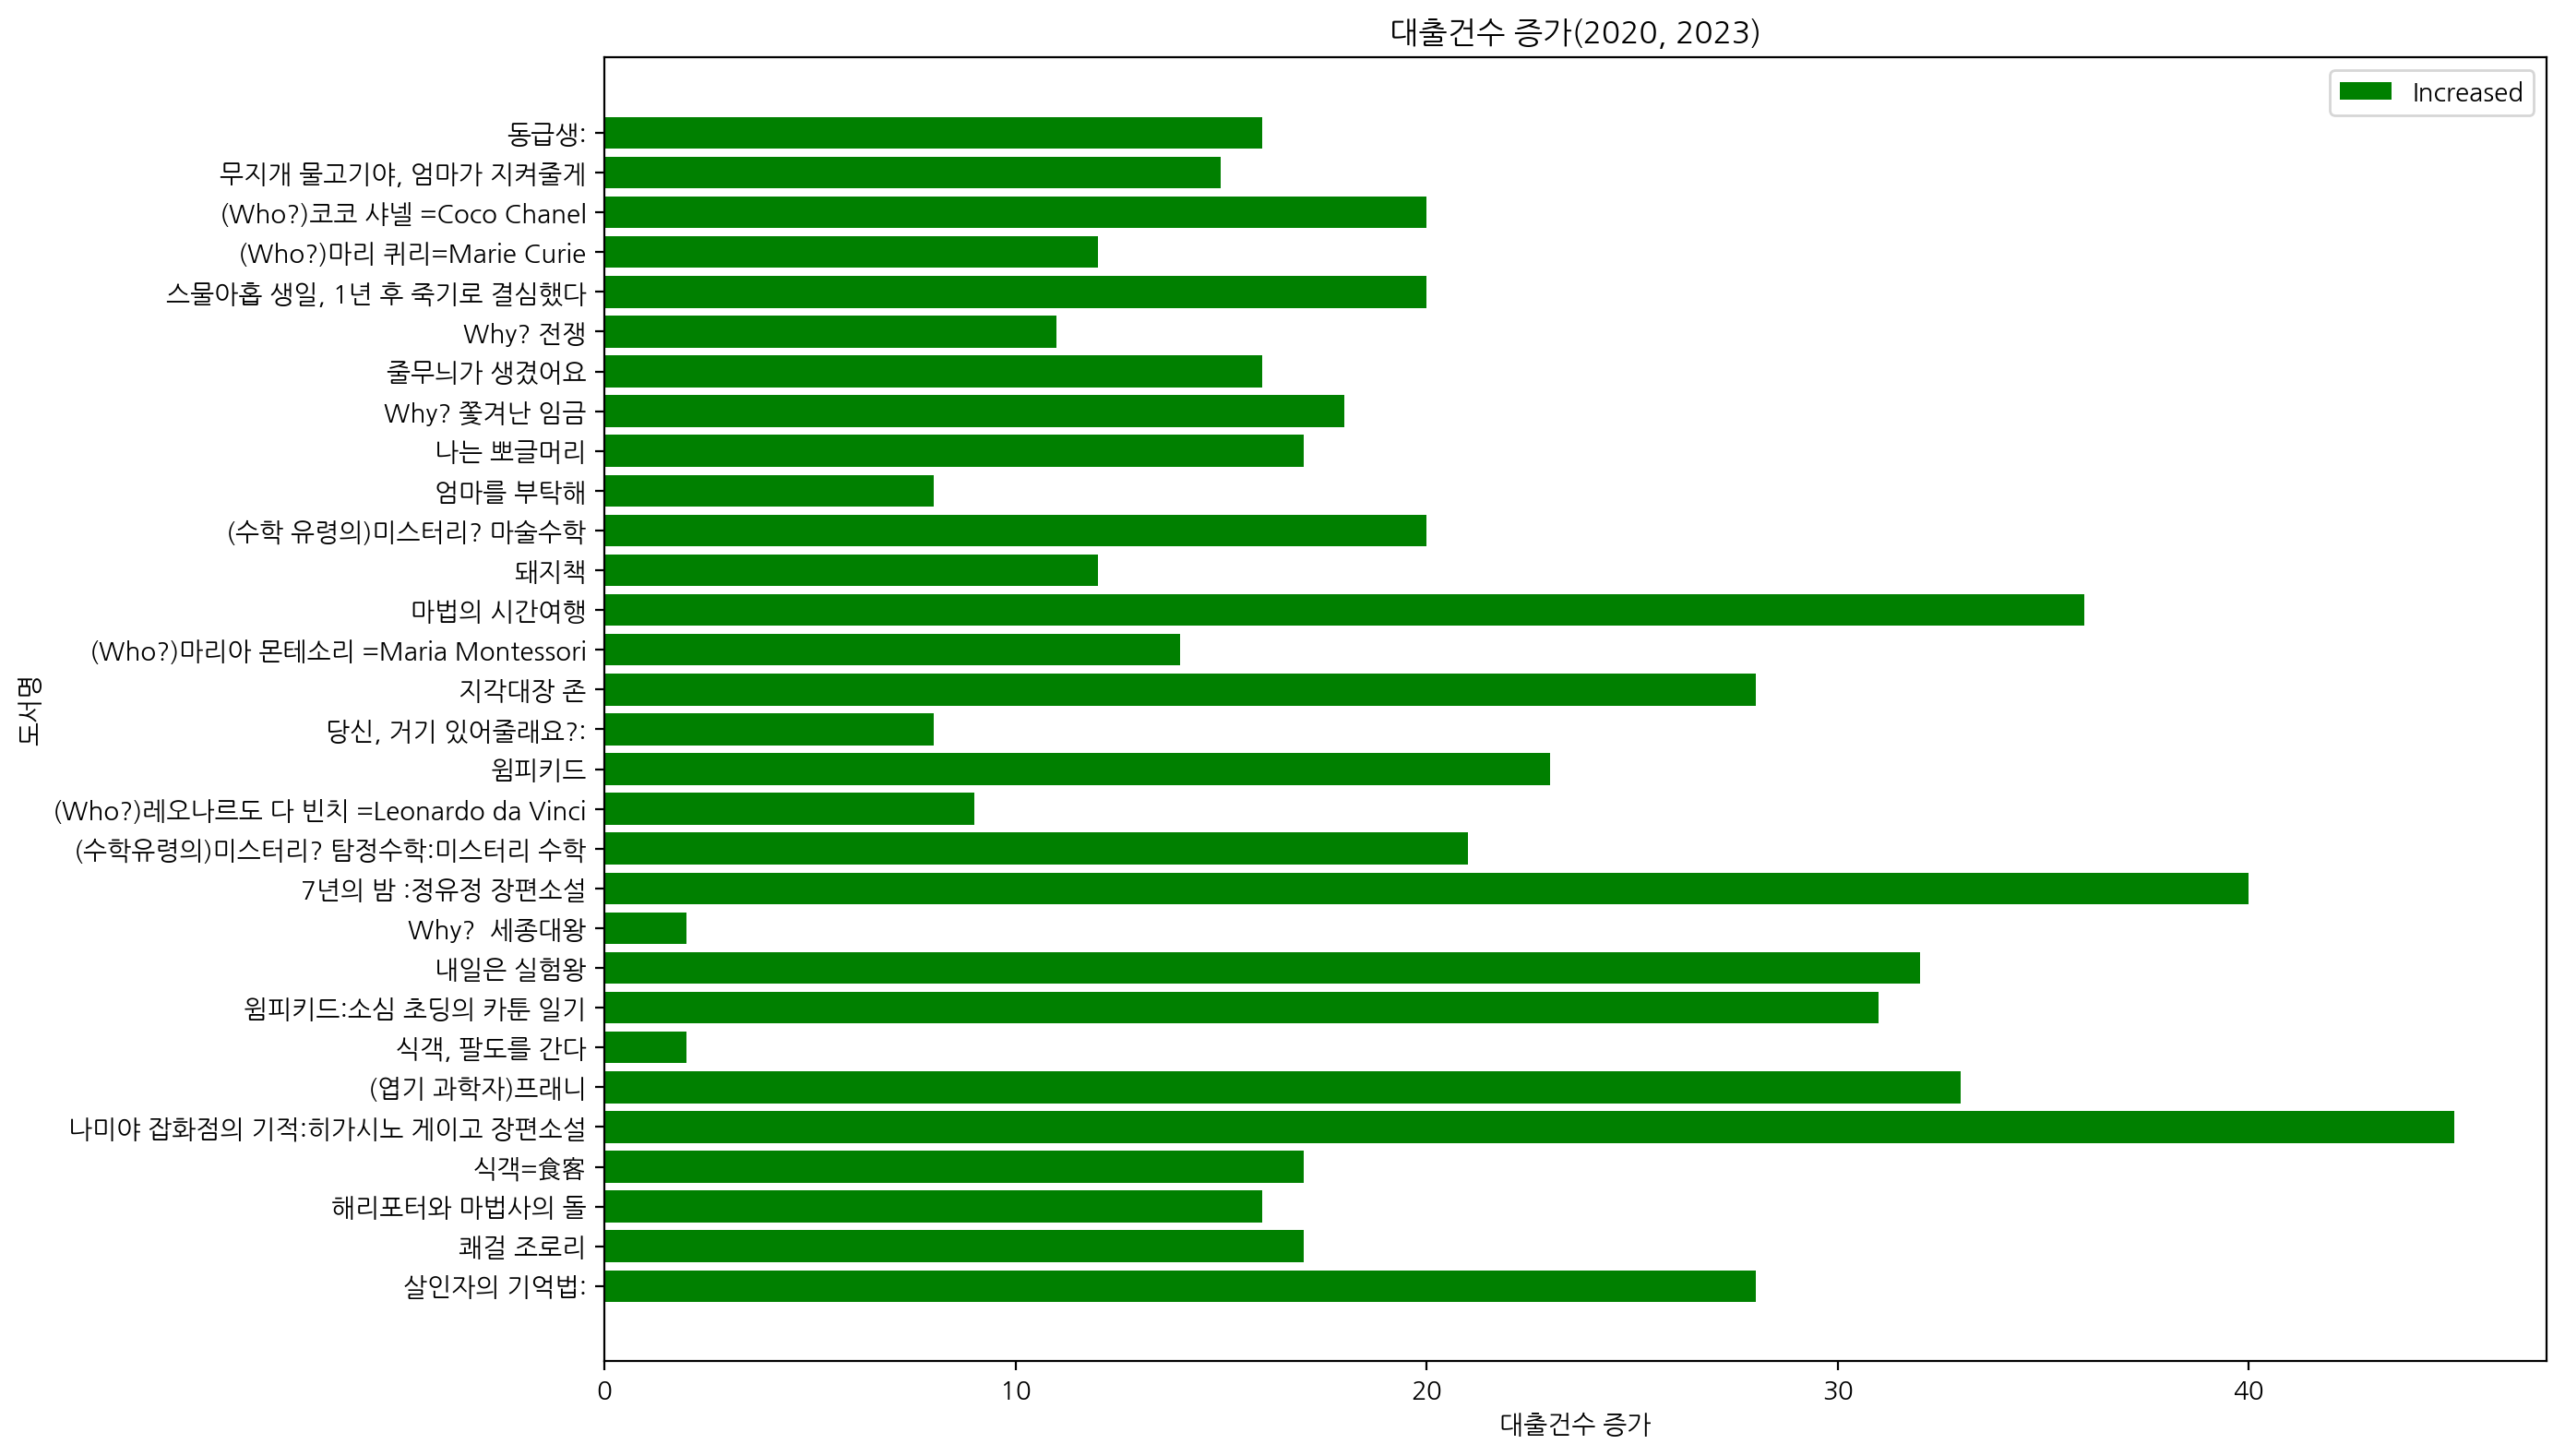

In [283]:
# 증가한 책 그래프 표현

plt.figure(figsize=(14, 8))

plt.barh(increased_books['도서명'].astype(str), increased_books['Change'], color='green', label='Increased')

plt.xlabel('대출건수 증가')
plt.ylabel('도서명')
plt.title('대출건수 증가(2020, 2023)')
plt.legend()
plt.tight_layout()
plt.show()

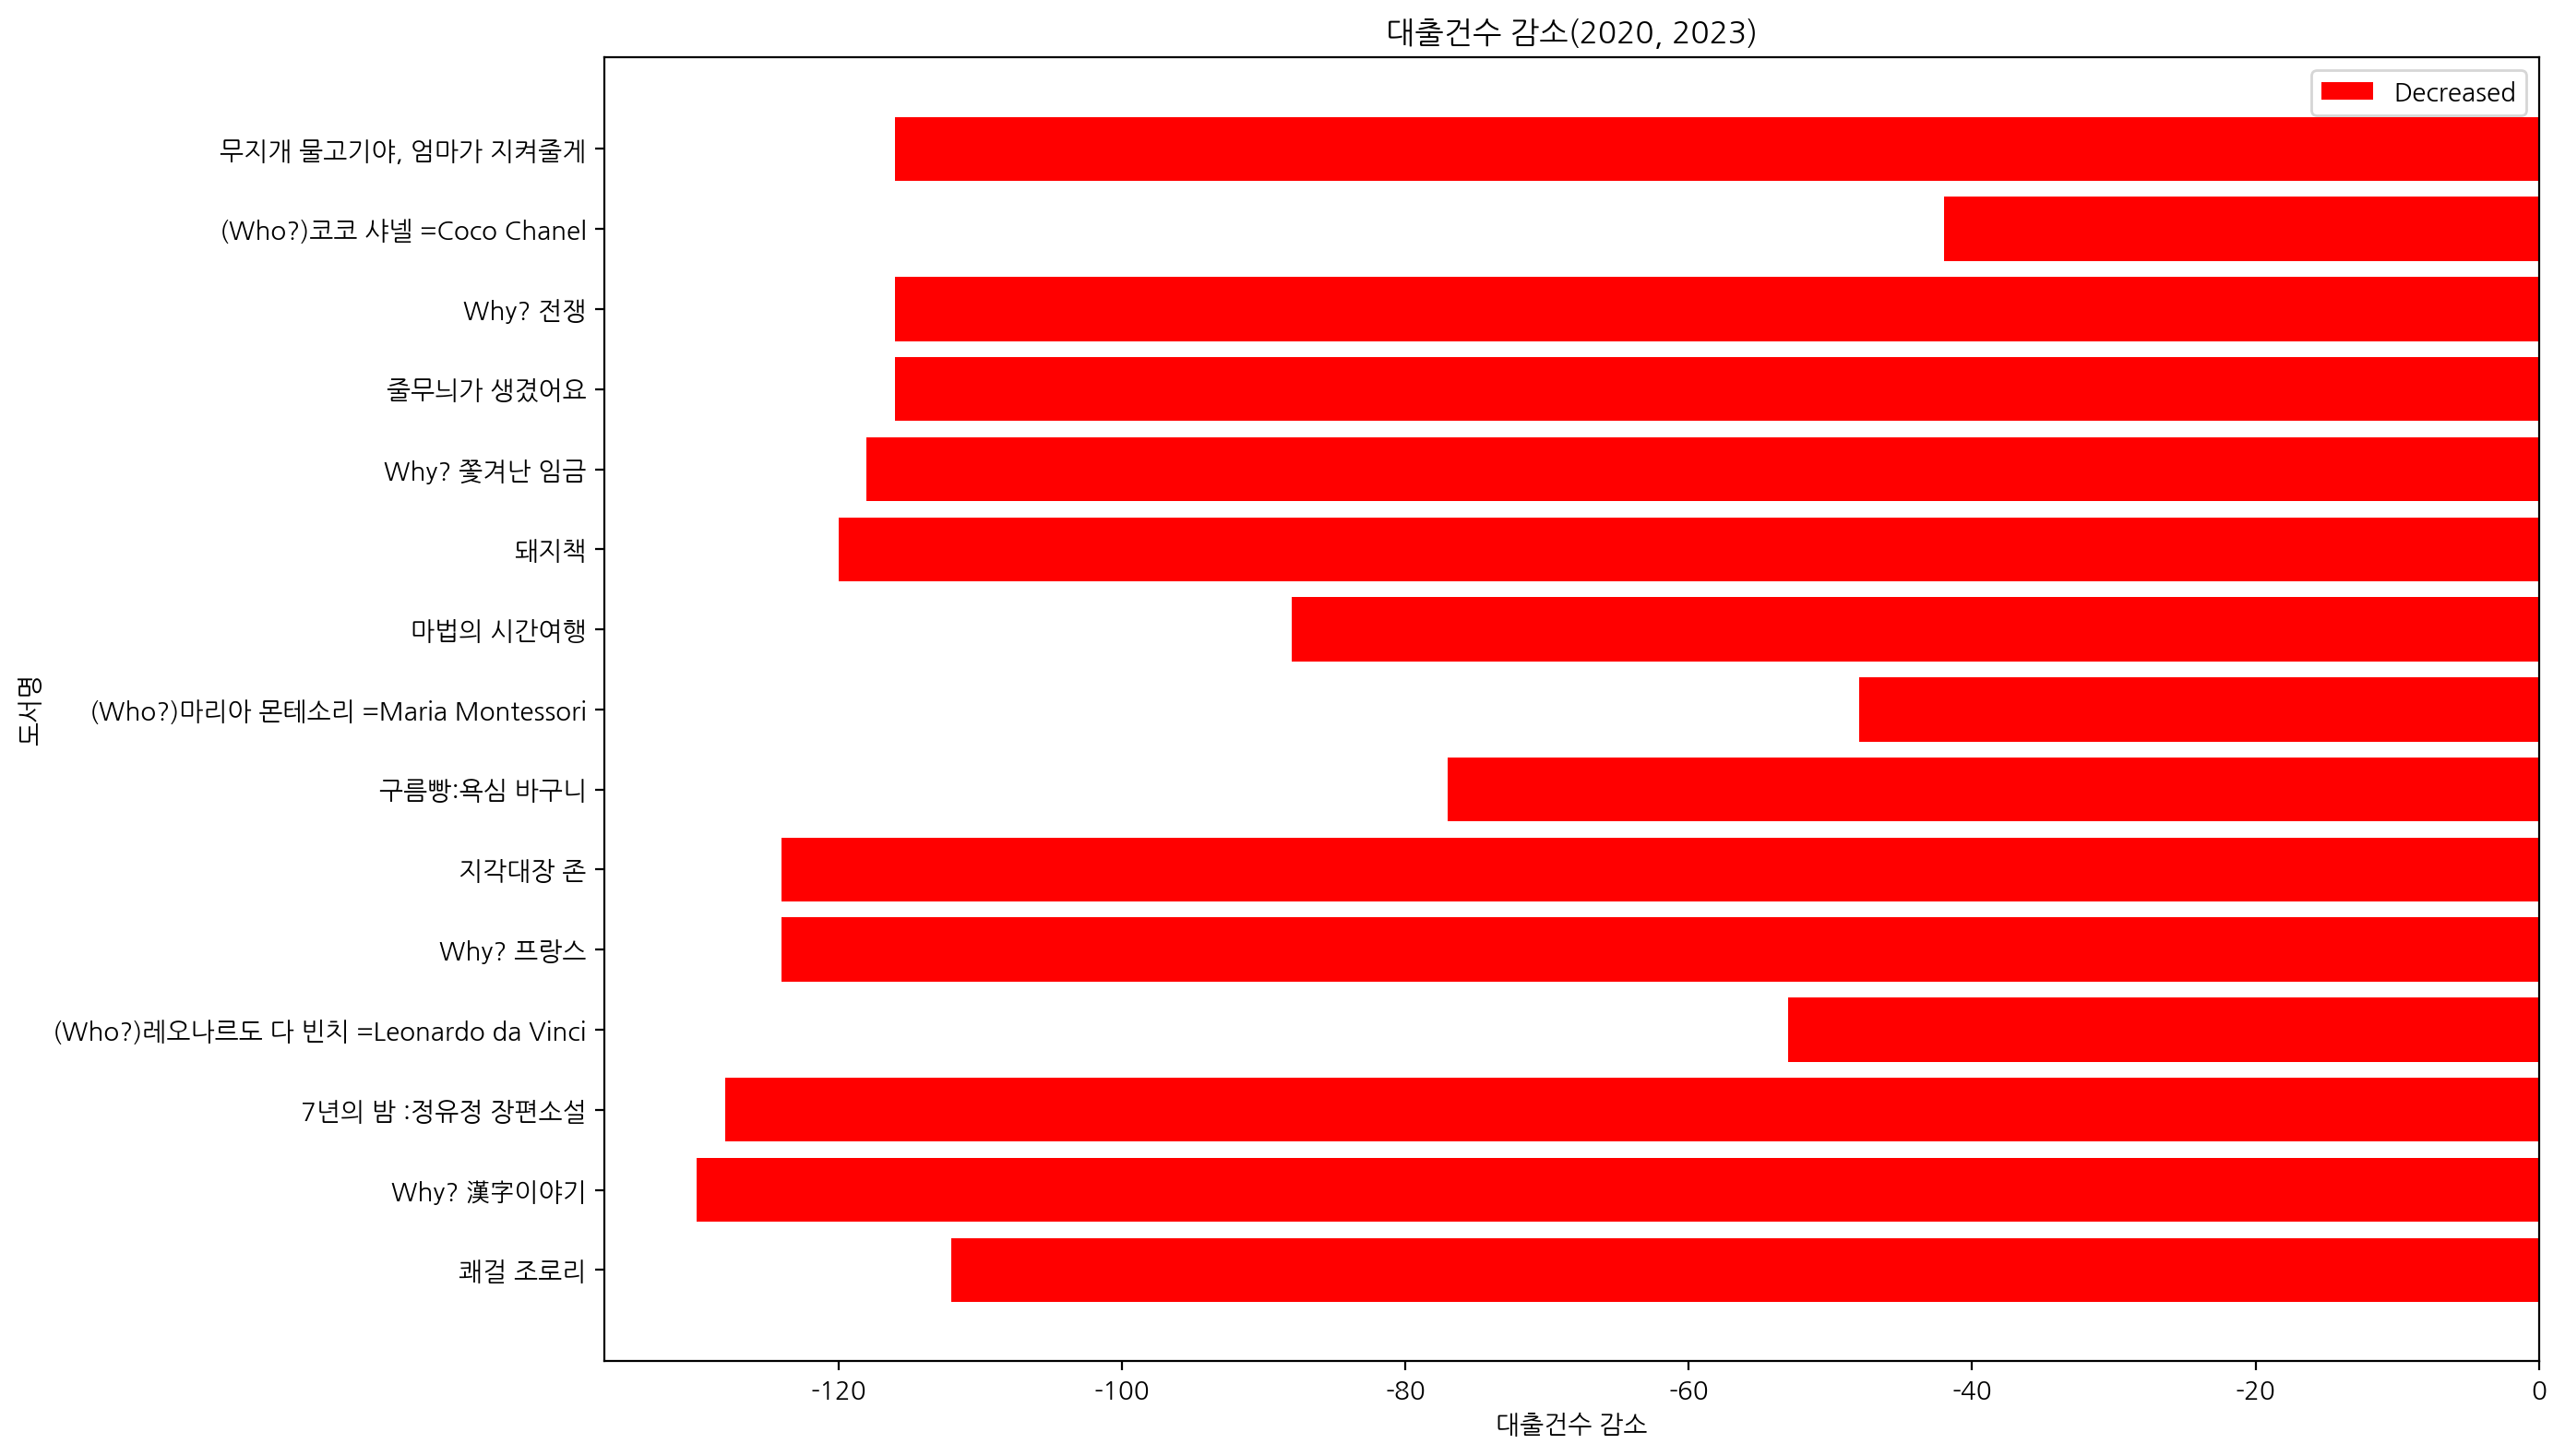

In [284]:
# 감소한 책 그래프 표현

plt.figure(figsize=(14, 8))

plt.barh(decreased_books['도서명'].astype(str), decreased_books['Change'], color='red', label='Decreased')
plt.xlabel('대출건수 감소')
plt.ylabel('도서명')
plt.title('대출건수 감소(2020, 2023)')
plt.legend()
plt.tight_layout()
plt.show()

# **6. 위의 통계를 도출하면서 필요한 전처리 (중복 제거, 누락값 처리, 잘못된 값 처리 등)를 강의 내용을 참고하여 수행**

In [285]:
# 중복 제거

df_2020.drop_duplicates(subset=['ISBN'], inplace=True)
df_2023.drop_duplicates(subset=['ISBN'], inplace=True)

In [286]:
# 누락값 처리

df_2020.dropna(subset=['ISBN', '도서명', '대출건수_2020'], inplace=True)
df_2023.dropna(subset=['ISBN', '도서명', '대출건수_2023'], inplace=True)

In [287]:
# 잘못된 값 처리 (대출건수가 음수인 경우 제거)

df_2020 = df_2020[df_2020['대출건수_2020'] >= 0]
df_2023 = df_2023[df_2023['대출건수_2023'] >= 0]

# **7. 위의 통계 외에도 2020년과 2023년을 비교하기에 유의미하다고 여겨지는 분석을 각자 수행하고 그 결과물을 그래프로 표현. 결과에 대한 분석을 코드에 추가 (텍스트, 주석 등)**

In [288]:
# 2020년 11월과 2023년 11월의 대출 상위 10권의 대출건수 변화를 보기위해 각 연도의 상위 10권 추출

top10_2020 = top50_2020.nlargest(10, '대출건수_2020')[['ISBN', '도서명', '대출건수_2020']]
top10_2023 = df_2023[df_2023['ISBN'].isin(top10_2020['ISBN'])][['ISBN', '도서명', '대출건수_2023']]

<Figure size 1000x600 with 0 Axes>

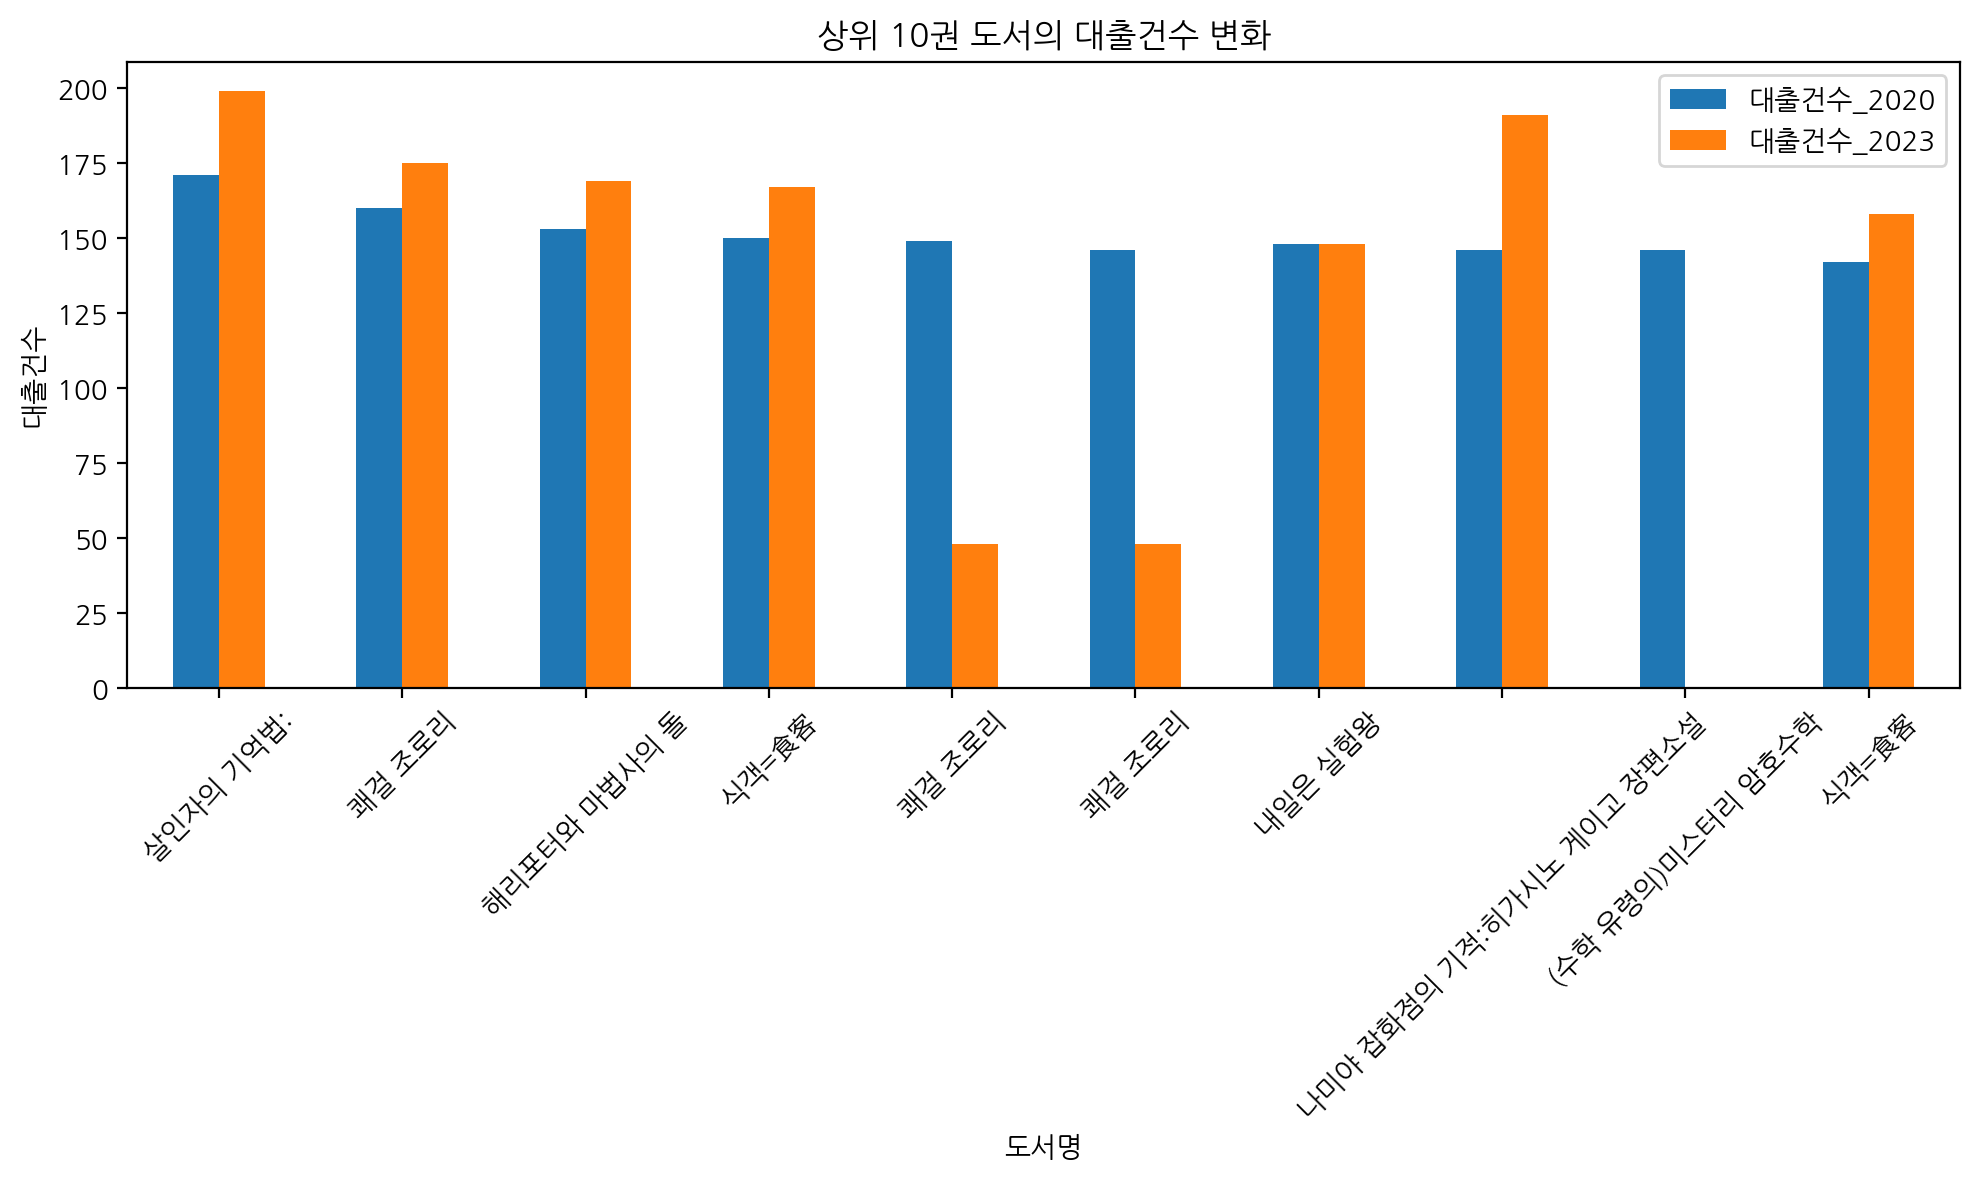

In [289]:
# 각 연도의 상위 10권의 대출건수 변화를 그래프로 표현

plt.figure(figsize=(10, 6))
top10_merged = pd.merge(top10_2020, top10_2023, on='ISBN', how='outer', suffixes=('_2020', '_2023')).fillna(0)
top10_merged.set_index('도서명_2020', inplace=True)
top10_merged[['대출건수_2020', '대출건수_2023']].plot(kind='bar', figsize=(10, 6))
plt.xlabel('도서명')
plt.ylabel('대출건수')
plt.title('상위 10권 도서의 대출건수 변화')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()